# Retail Giant Sales Forecasting Assignment

## Data Prepration: Data Understaning, Data Cleanup and Data Visualization

### 1.1 Importing the Libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

### 1.2 Reading the Data

In [72]:
df=pd.read_csv('Global+Superstore+Data.csv')

### 1.3 Looking at the data

In [73]:
df.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


### 1.4 Checking the Data Types

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


### 1.5 Changing data type of Order Date

In [75]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y').dt.to_period('m')

In [76]:
df.head()

,Order Date,Segment,Market,Sales,Profit
0,2012-07,Consumer,US,2309.650,762.1845
1,2013-02,Corporate,APAC,3709.395,-288.7650
2,2013-10,Consumer,APAC,5175.171,919.9710
3,2013-01,Home Office,EU,2892.510,-96.5400
4,2013-11,Consumer,Africa,2832.960,311.5200


### 1.6 Creating Market Segments

In [77]:
df['Market_Segment']= df['Market']+'_' +df['Segment']
df.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,2012-07,Consumer,US,2309.650,762.1845,US_Consumer
1,2013-02,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,2013-10,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,2013-01,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,2013-11,Consumer,Africa,2832.960,311.5200,Africa_Consumer


### 1.7 Plotting Sales for all the 21 Market Segments

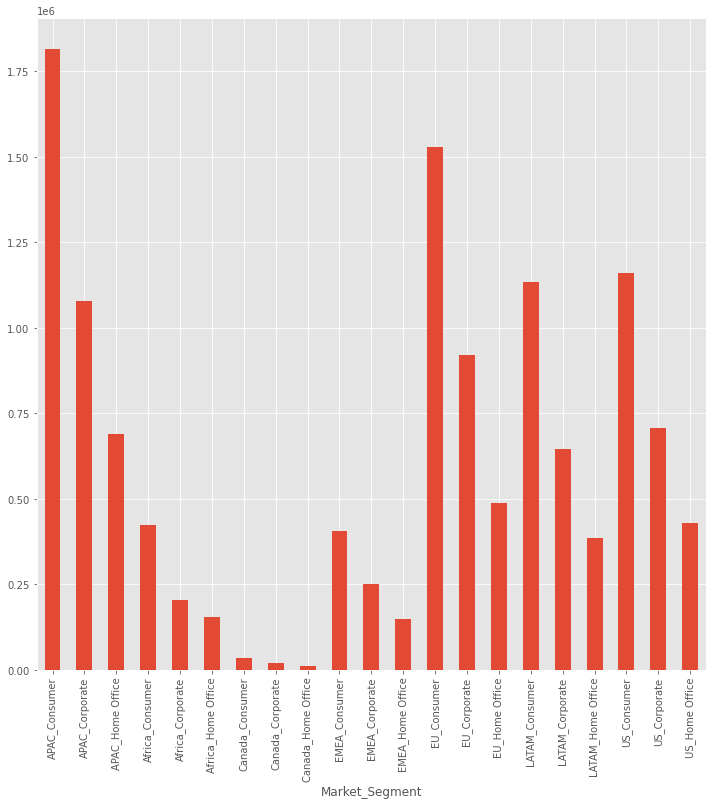

In [78]:
plt.figure(figsize=(12,12))
df.groupby(by='Market_Segment')['Sales'].sum().plot(kind='bar')
plt.show()

### 1.8 Plotting Profit for all the 21 Market Segments

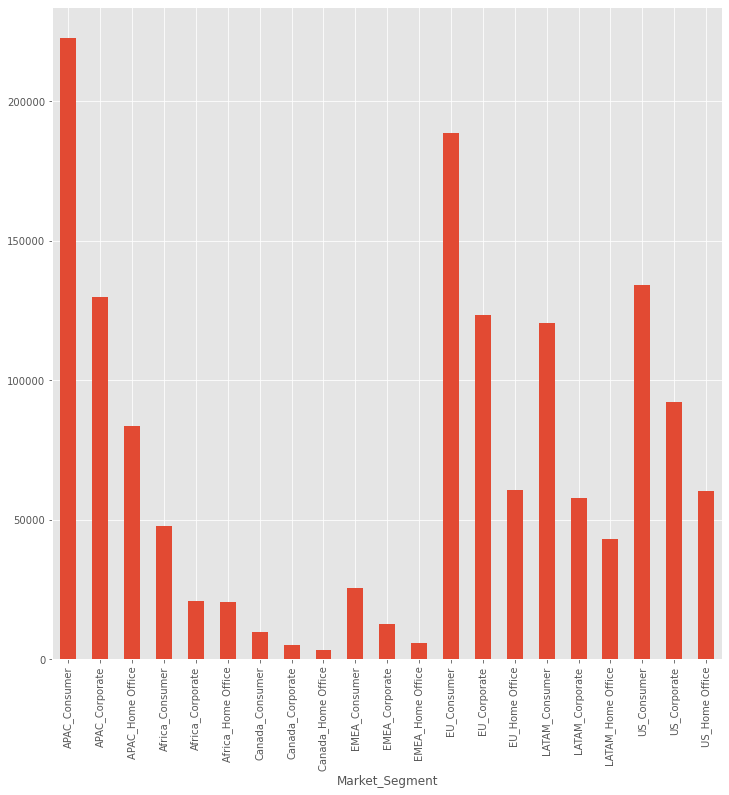

In [79]:
plt.figure(figsize=(12,12))
df.groupby(by='Market_Segment')['Profit'].sum().plot(kind='bar')
plt.show()

### 1.9 Creating Pivot Table

In [80]:
df_pt=df.pivot_table(index='Order Date', values='Profit', columns='Market_Segment', aggfunc='sum')

In [81]:
df_pt.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.7,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.360,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.041,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.223,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.858,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.102,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088


### 1.10 Checking the Shape

In [82]:
df_pt.shape

(48, 21)

In [83]:
df_pt.columns

Index(['APAC_Consumer', 'APAC_Corporate', 'APAC_Home Office',
       'Africa_Consumer', 'Africa_Corporate', 'Africa_Home Office',
       'Canada_Consumer', 'Canada_Corporate', 'Canada_Home Office',
       'EMEA_Consumer', 'EMEA_Corporate', 'EMEA_Home Office', 'EU_Consumer',
       'EU_Corporate', 'EU_Home Office', 'LATAM_Consumer', 'LATAM_Corporate',
       'LATAM_Home Office', 'US_Consumer', 'US_Corporate', 'US_Home Office'],
      dtype='object', name='Market_Segment')

### 1.11 Train-Test Split

In [84]:
train_len=42
train=df_pt[:train_len]
test=df_pt[train_len:]

### 1.12 Calculating Coefficient of Variance (CoV)

In [85]:
cov = pd.DataFrame(columns = ['Segment', 'CoV'])

In [86]:
for i in df_pt.columns:
    var = {"Segment": i, "CoV": np.std(train[i])/np.mean(train[i])}
    cov = cov.append(var, ignore_index=True)

In [87]:
cov.sort_values(by='CoV')

,Segment,CoV
0,APAC_Consumer,0.596404
12,EU_Consumer,0.647485
15,LATAM_Consumer,0.680684
13,EU_Corporate,0.689346
1,APAC_Corporate,0.731926
16,LATAM_Corporate,0.880260
19,US_Corporate,1.027209
2,APAC_Home Office,1.048817
18,US_Consumer,1.095295
14,EU_Home Office,1.114681


#### As a sales manager, a person would like to operate in a market with least variability in terms of sales. In such cases the probability of getting the predictions of sales correct are quite high. And accordingly, a strategy can also be made to ensure that the demand can be met based on the forecast and profitability is not hampered.
#### Coefficient of Variation can be used as a metric to measure variability. The formula for CoV is :
#### (𝝈/𝝁)
#### 𝒘𝒉𝒆𝒓𝒆 𝝈 = 𝒔𝒕𝒂𝒏𝒅𝒂𝒓𝒅 𝒅𝒆𝒗𝒊𝒂𝒕𝒊𝒐𝒏 𝒂𝒏𝒅 𝝁 = 𝒎𝒆𝒂𝒏
#### Going by this philosophy we observe that APAC_Consumer is the market segment with the least CoV and hence, from now onwards we will base on analysis only on this market segment.

### 1.13 Plotting CoV Values

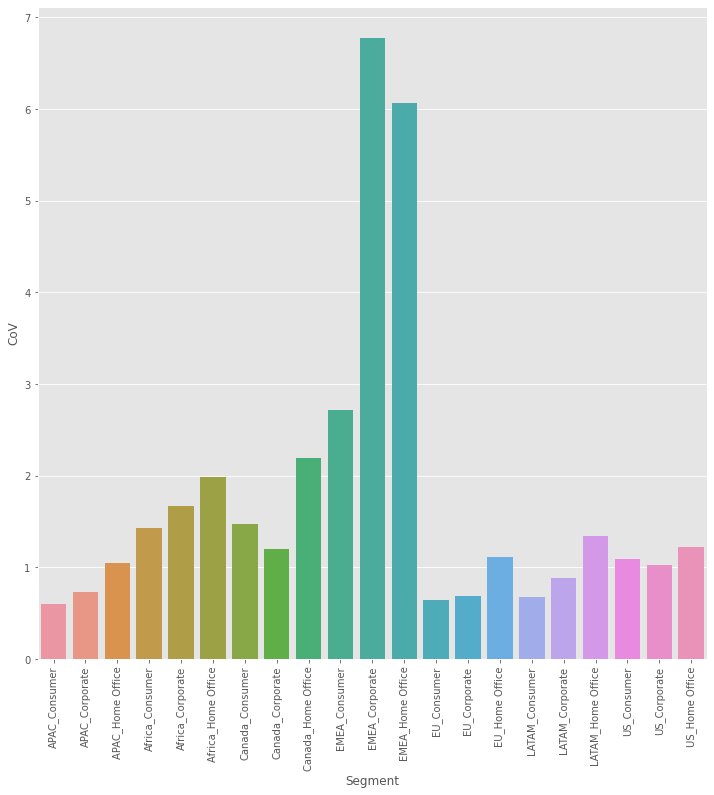

In [88]:
plt.figure(figsize=(12,12))
sns.barplot(data=cov, x='Segment', y='CoV')
plt.xticks(rotation=90)
plt.show()

##### It has become evident that APAC_Consumer has the least CoV i.e it is the most stable market segment. As a result of this it makes sense to analyse this market segment only.

### 1.14 Creating a seperate Data Frame that has data related to APAC_Consumer only

In [89]:
dfinal=df[df['Market_Segment']=='APAC_Consumer']
dfinal.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
2,2013-10,Consumer,APAC,5175.171,919.971,APAC_Consumer
6,2011-11,Consumer,APAC,1822.080,564.840,APAC_Consumer
7,2012-04,Consumer,APAC,5244.840,996.480,APAC_Consumer
14,2013-06,Consumer,APAC,3701.520,1036.080,APAC_Consumer
29,2012-02,Consumer,APAC,1878.720,582.360,APAC_Consumer


In [90]:
### Dropping all the other columns apart from Order Date, Sales and Profit and setting order date as the index.
dfinal.drop(columns=['Segment','Market','Market_Segment'], inplace=True)
dfinal.set_index('Order Date')

,Sales,Profit
Order Date,,
2013-10,5175.1710,919.9710
2011-11,1822.0800,564.8400
2012-04,5244.8400,996.4800
2013-06,3701.5200,1036.0800
2012-02,1878.7200,582.3600
...,...,...
2013-01,38.9709,-32.3991
2014-11,6.9000,-0.8400
2011-11,17.2800,-13.9200


In [91]:
dfinal=dfinal.groupby(by='Order Date').sum()

In [92]:
dfinal.shape

(48, 2)

### 1.15 Plotting the data

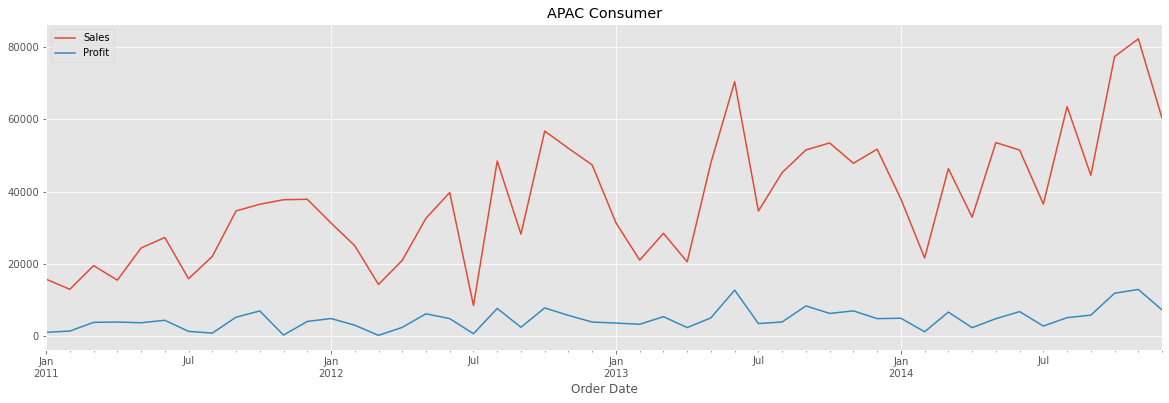

In [93]:
dfinal.plot(figsize=(20,6))
plt.legend(loc='best')
plt.title('APAC Consumer')
plt.show()

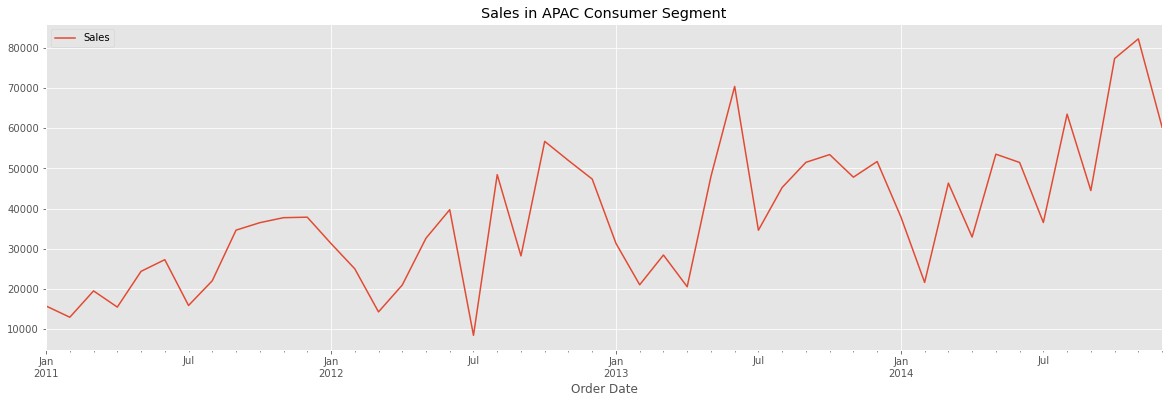

In [94]:
dfinal['Sales'].plot(figsize=(20,6))
plt.legend(loc='best')
plt.title('Sales in APAC Consumer Segment')
plt.show()

### 1.16 Decomposing the above time series plot to look for trend and seasonality

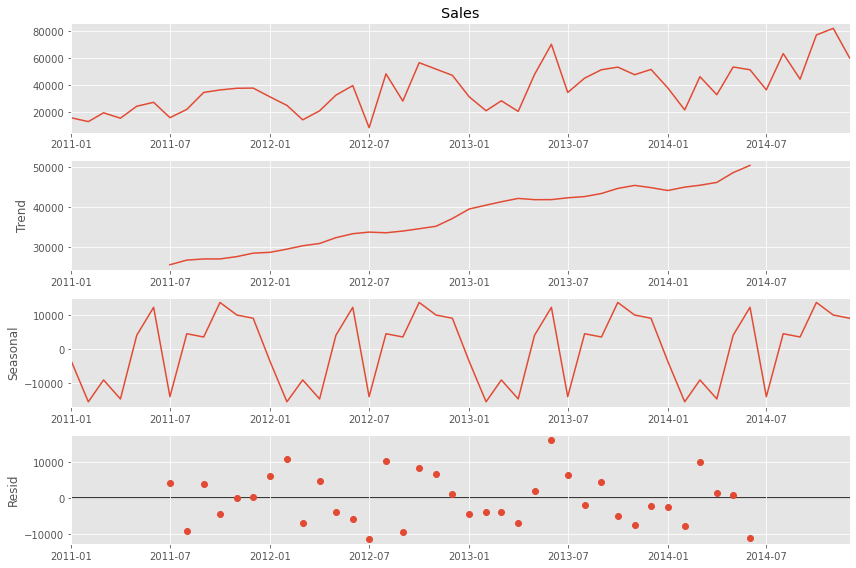

In [95]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
from statsmodels.tsa.seasonal import seasonal_decompose
dfinal.Sales.interpolate(inplace = True)
dfinal.Sales.index=dfinal.Sales.index.to_timestamp()
decomposition = seasonal_decompose(dfinal.Sales)
fig = decomposition.plot()
plt.show()

##### It is clear from the above plot that an uptrend exists and some degree of seasonality also exists. 
##### Therefore, Holt's Winter Method and SARIMA will yield far better results than other models. But for the sake of completeness and comparison we will look at other models and their performance and accuracy also.

In [96]:
#Converting datetime to timestamp
dfinal = dfinal.to_timestamp() 

### 1.17 Train-Test Split

In [97]:
train=dfinal[:train_len]
test=dfinal[train_len:]

In [98]:
train.head()

,Sales,Profit
Order Date,,
2011-01-01,15711.7125,991.2825
2011-02-01,12910.8588,1338.8688
2011-03-01,19472.5632,3747.1632
2011-04-01,15440.3046,3846.4746
2011-05-01,24348.9723,3639.9423


## Building Models for Forecasting

### 2.1 NAIVE Method

In [99]:
#Using the Naive Method for forecasting
y_hat_naive = test.copy()
y_hat_naive['Naive Forecast']=train['Sales'][train_len-1]

### Plot of train, test and forecast

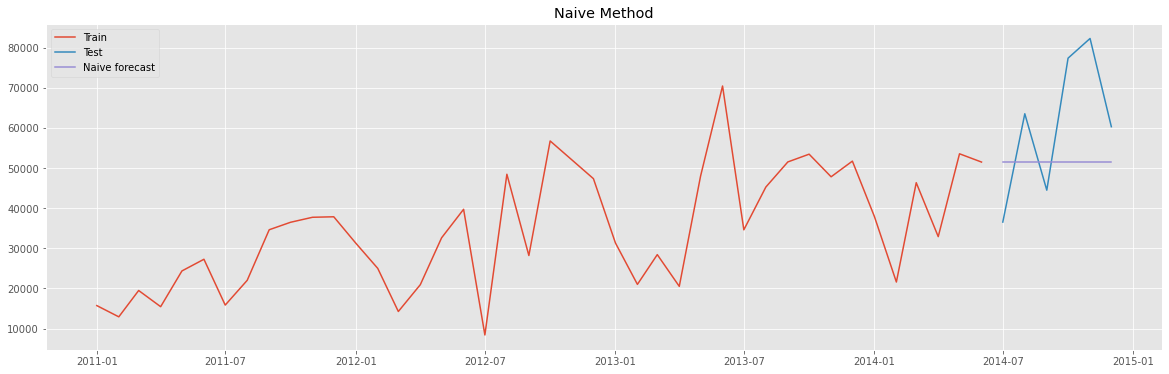

In [100]:
plt.figure(figsize=(20,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['Naive Forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculating RMSE and MAPE

In [101]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['Naive Forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['Naive Forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive Forecast Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86


### 2.2 Simple Average Method

In [102]:
#Using Simple Average Method
y_hat_avg = test.copy()
y_hat_avg['Average Forecast']=train['Sales'].mean()

### Plot of train, test and forecast

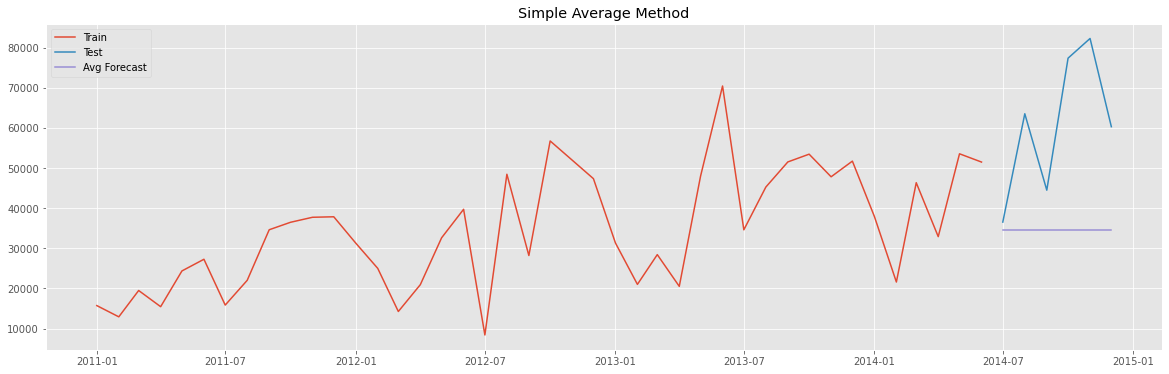

In [103]:
plt.figure(figsize=(20,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['Average Forecast'], label='Avg Forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

### Calculating RMSE and MAPE

In [104]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['Average Forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['Average Forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple Average Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18


### 2.3 Simple Moving Average Method

In [105]:
#Using Moving Average Method
y_hat_sma=dfinal.copy()
ma_window=2
y_hat_sma['sma_forecast'] = dfinal['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

### Plot of train, test and forecast

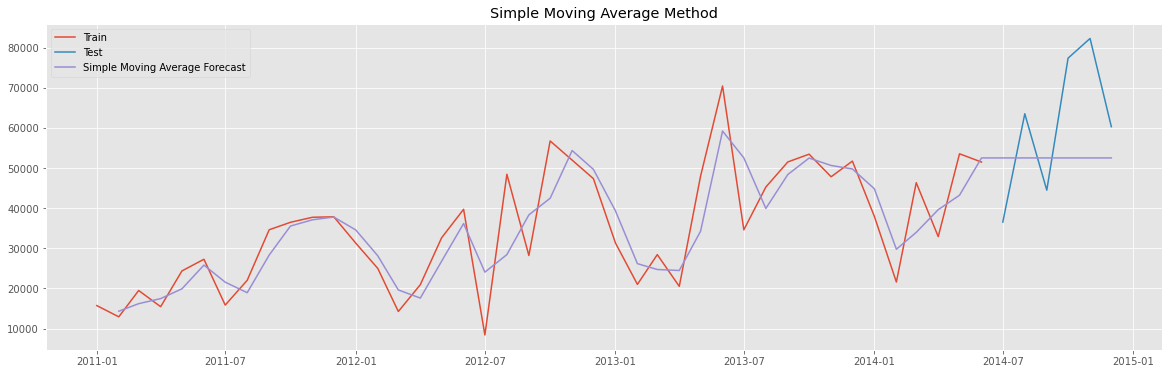

In [106]:
plt.figure(figsize=(20,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple Moving Average Forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

### Calculating RMSE and MAPE

In [107]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple Moving Average Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,18287.55,26.73


#### Since, we have more than 10 historical observations, using 'Simple moving Average', 'Naive method' or 'Simple Average' may not make a lot sense. As these 3 modelling techniques would not be able to forecast accurately. But still we have made the models using these techniques so that we can identify their shortcomings and do a comparitive analysis of RMSE or MAPE values of these models with that of Holt Winter's (Additive and Multiplicative), ARIMA and SARIMA Models.

### 2.4 Simple Exponential Smoothing

In [108]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

### Plot train, test and forecast

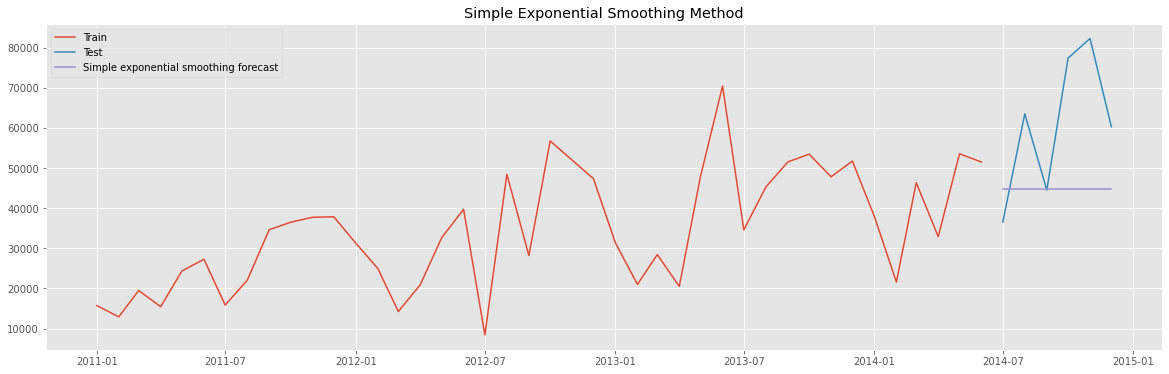

In [109]:
plt.figure(figsize=(20,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calculating RMSE and MAPE

In [110]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70


### 2.5 Holt's method with trend

In [111]:
#Assuming Trend to be Additive
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.45285714285714285, 'smoothing_trend': 0.0646938775510204, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 15711.7125, 'initial_trend': -2800.8536999999997, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot of train, test and forecast

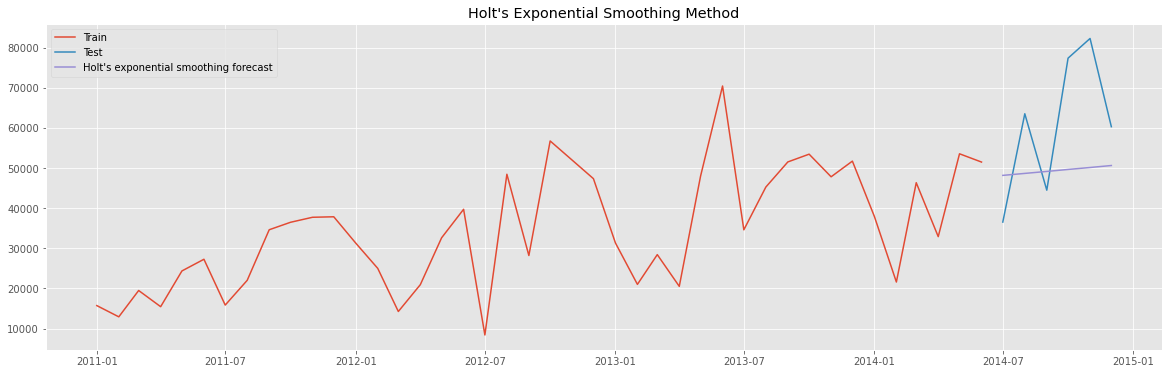

In [112]:
plt.figure(figsize=(20,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculating RMSE and MAPE

In [113]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12


### 2.6 Holt's Winters Method

In [114]:
#Assuming Trend and Seasonality to be Additive
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['HW_Forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.040357142857142855, 'smoothing_trend': 0.040357142857142855, 'smoothing_seasonal': 0.13709183673469388, 'damping_trend': nan, 'initial_level': 29061.2919, 'initial_trend': 730.4167145833334, 'initial_seasons': array([-13349.5794, -16150.4331,  -9588.7287, -13620.9873,  -4712.3196,
        -1801.2723, -13218.4602,  -7049.0553,   5551.893 ,   7410.7551,
         8661.312 ,   8785.6992]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot of train, test and forecast

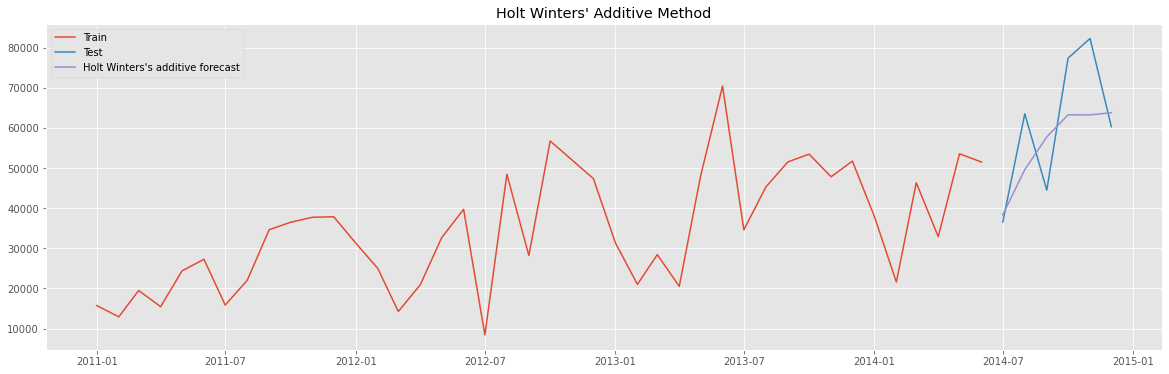

In [115]:
plt.figure(figsize=(20,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['HW_Forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculating RMSE and MAPE

In [116]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['HW_Forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['HW_Forecast'])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':["Holt Winter's Additive Method"], 'RMSE': [rmse],'MAPE': [mape]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12
0,Holt Winter's Additive Method,12565.60,17.32


In [117]:
#Assuming Trend to be Multiplicative and Seasonality to be Additive
from statsmodels.tsa.holtwinters import ExponentialSmoothing
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['HW_Forecast_2'] = model_fit.forecast(6)

{'smoothing_level': 0.005, 'smoothing_trend': 0.005, 'smoothing_seasonal': 0.3198214285714286, 'damping_trend': nan, 'initial_level': 29061.2919, 'initial_trend': 730.4167145833334, 'initial_seasons': array([0.54064054, 0.44426307, 0.67005153, 0.53130138, 0.83784893,
       0.93801816, 0.54515235, 0.75744178, 1.19104082, 1.25500432,
       1.29803603, 1.3023162 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot of train, test and forecast

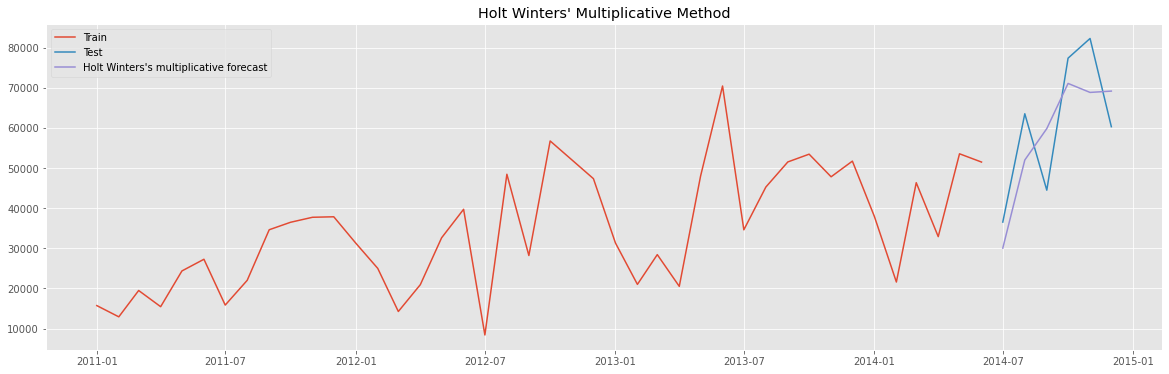

In [118]:
plt.figure(figsize=(20,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['HW_Forecast_2'], label='Holt Winters\'s multiplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Multiplicative Method')
plt.show()

### Calculating RMSE and MAPE

In [119]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['HW_Forecast_2'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['HW_Forecast_2'])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':["Holt Winter's Multiplicative Method"], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12
0,Holt Winter's Additive Method,12565.60,17.32
0,Holt Winter's Multiplicative Method,10876.35,18.27


## Regression Models

### 3.1 Stationarity Test

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [120]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(dfinal['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.595515
Critical Values @ 0.05: 0.46
p-value: 0.023044


##### The p-value is less than 0.05 and thus, our Null Hypothesis that the data is stationary gets rejected over here. We have to take necessary steps such as differencing and boxcox transformation to make this dataset stationary and suitable for Auto Regression Models.

### 3.2 Boxcox Transformation

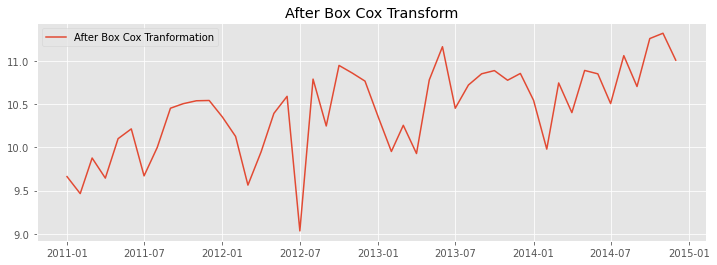

In [121]:
#Using Boxcox Transformation to make variance constant
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(dfinal['Sales'], lmbda=0), index = dfinal.index) # lmbda=0 implies log transformation

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox Tranformation')
plt.legend(loc='best')
plt.title('After Box Cox Transform')
plt.show()

### 3.3 Differencing

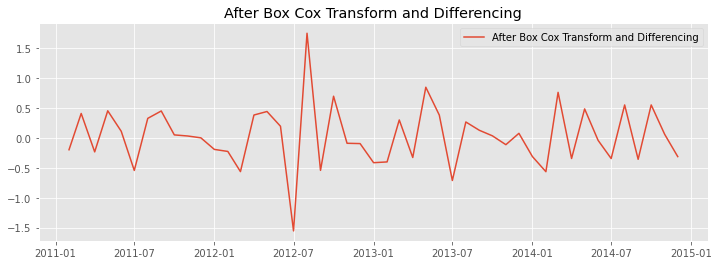

In [122]:
#Using Differencing to remove trend
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), dfinal.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transform and Differencing')
plt.legend(loc='best')
plt.title('After Box Cox Transform and Differencing')
plt.show()

In [123]:
data_boxcox_diff.dropna(inplace=True)

In [124]:
#Now we need to perform the Train-Test split again as boxcox transform and differencing has been performed on the entire data.
#This is for ARIMA Model
train_post_boxcox=data_boxcox[:train_len]
test_post_boxcox=data_boxcox[train_len:]

In [125]:
#For rest of the models
train_post_boxcox_diff = data_boxcox_diff[:train_len-1]
test_post_boxcox_diff = data_boxcox_diff[train_len-1:]

## Auto Regressive Models

### 4.1 AR Model

In [126]:
#Making the most basic AR Model and priting it's parameters
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_post_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const     0.031315
ar.L1    -0.483974
sigma2    0.211971
dtype: float64


In [127]:
#Transformation to the original form by performing cumulative sum to remove differencing and exponenting to remove boxcox transform.
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot of train, test and forecast

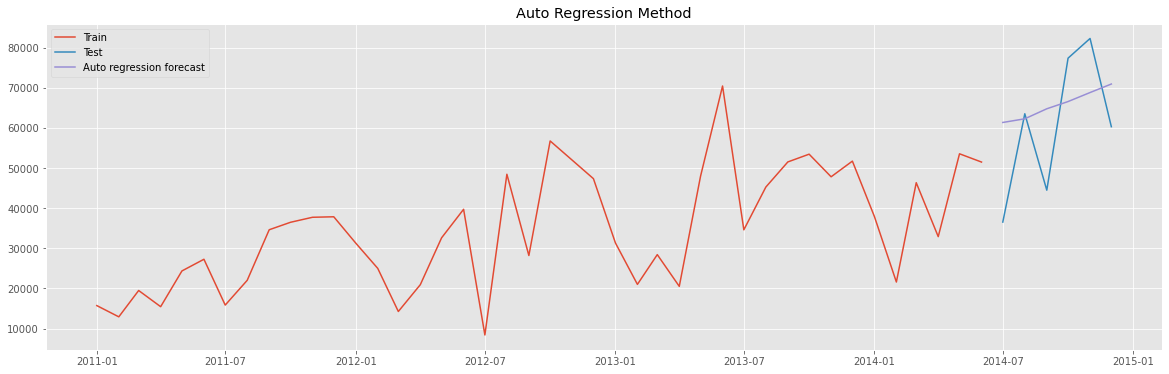

In [128]:
#Make a plot of train, test and forecast
plt.figure(figsize=(20,6))
plt.plot(dfinal[:train_len]['Sales'], label='Train')
plt.plot(dfinal[train_len:]['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

### Calculating RMSE and MAPE

In [129]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['Auto Regression Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12
0,Holt Winter's Additive Method,12565.60,17.32
0,Holt Winter's Multiplicative Method,10876.35,18.27
0,Auto Regression Method,15498.94,27.26


### 4.2 MA Model

In [130]:
#Making the most basic Moving Average Model
model = ARIMA(train_post_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const     0.022689
ma.L1    -0.999630
sigma2    0.155059
dtype: float64


In [131]:
#Transformation to the original form by performing cumulative sum to remove differencing and exponenting to remove boxcox transform.
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ma_forecast_boxcox'] = y_hat_ar['ma_forecast_boxcox_diff'].cumsum()
y_hat_ar['ma_forecast_boxcox'] = y_hat_ar['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ma_forecast'] = np.exp(y_hat_ar['ma_forecast_boxcox'])

### Plot of train, test and forecast

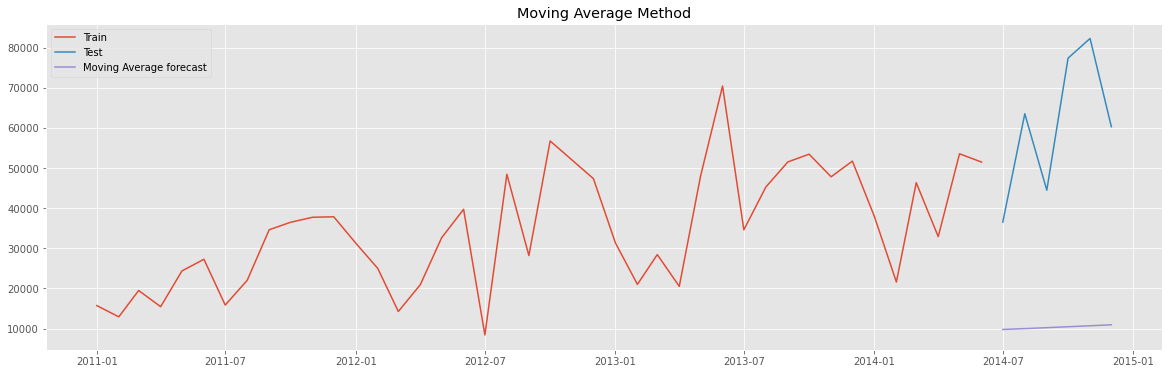

In [132]:
#Make a plot of train, test and forecast
plt.figure(figsize=(20,6))
plt.plot(dfinal[:train_len]['Sales'], label='Train')
plt.plot(dfinal[train_len:]['Sales'], label='Test')
plt.plot(y_hat_ar['ma_forecast'][test.index.min():], label='Moving Average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

### Calculating RMSE and MAPE

In [133]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ma_forecast'][test.index.min():])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['Moving Average Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12
0,Holt Winter's Additive Method,12565.60,17.32
0,Holt Winter's Multiplicative Method,10876.35,18.27
0,Auto Regression Method,15498.94,27.26
0,Moving Average Method,52917.90,81.67


### 4.3 ARMA Model

In [134]:
#Making the ARMA Model
model = ARIMA(train_post_boxcox_diff, order=(1, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const     0.022805
ar.L1     0.115924
ma.L1    -0.999963
sigma2    0.153805
dtype: float64


In [135]:
#Transformation to the original form by performing cumulative sum to remove differencing and exponenting to remove boxcox transform.
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['arma_forecast_boxcox'] = y_hat_ar['arma_forecast_boxcox_diff'].cumsum()
y_hat_ar['arma_forecast_boxcox'] = y_hat_ar['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['arma_forecast'] = np.exp(y_hat_ar['arma_forecast_boxcox'])

### Plot of train, test and forecast

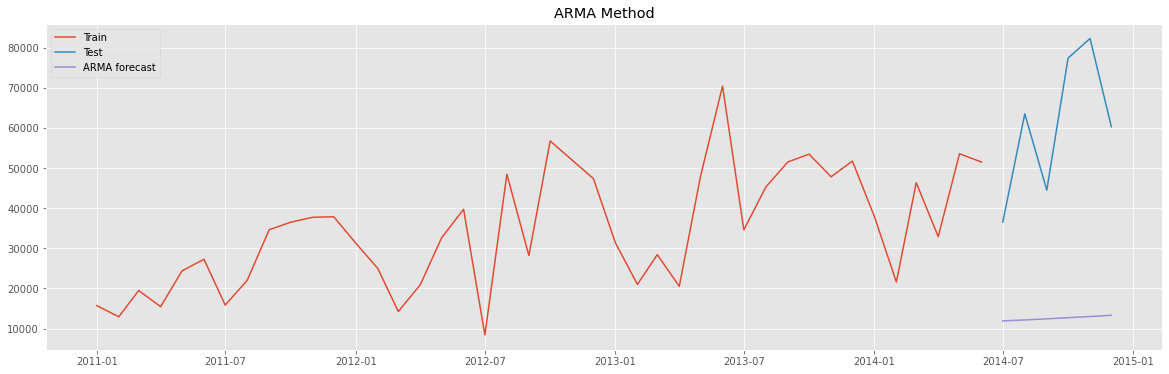

In [136]:
#Make a plot of train, test and forecast
plt.figure(figsize=(20,6))
plt.plot(dfinal[:train_len]['Sales'], label='Train')
plt.plot(dfinal[train_len:]['Sales'], label='Test')
plt.plot(y_hat_ar['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

### Calculating RMSE and MAPE

In [137]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['arma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['arma_forecast'][test.index.min():])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['ARMA Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple Moving Average Method,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,19473.57,26.12
0,Holt Winter's Additive Method,12565.60,17.32
0,Holt Winter's Multiplicative Method,10876.35,18.27
0,Auto Regression Method,15498.94,27.26
0,Moving Average Method,52917.90,81.67
0,ARMA Method,50776.18,77.69


### 4.4 ARIMA Model

In [138]:
#Making the ARIMA Model
from pmdarima.arima import auto_arima
arima_model=auto_arima(dfinal[:train_len]['Sales'], start_p=1, d=1, start_q=1, max_p=5, max_d=5, max_q=5, 
                       error_action='warn', trace=True, suppress_warnings=True, stepwise=True, random_state=20, n_fits=100)

ModuleNotFoundError: No module named 'pmdarima'

#### It is clear from the above analysis that ARIMA (0,1,1) is the best ARIMA model and not the one with p=1, d=1 and q=1 i.e ARIMA(1,1,1).

In [ ]:
#Making Predictions
arima_prediction=pd.DataFrame(arima_model.predict(n_periods=6),index=test_post_boxcox.index)
arima_prediction.columns=['ARIMA_Forecast']
arima_prediction

### Plot of train, test and forecast

In [ ]:
#Make a plot of train, test and forecast
plt.figure(figsize=(20,6))
plt.plot(dfinal[:train_len]['Sales'], label='Train')
plt.plot(dfinal[train_len:]['Sales'], label='Test')
plt.plot(arima_prediction, label='ARIMA forecast')
plt.legend(loc='best')
plt.title('ARIMA')
plt.show()

### Calculating RMSE and MAPE

In [139]:
rmse = np.sqrt(mean_squared_error(dfinal[train_len:]['Sales'], arima_prediction['ARIMA_Forecast'])).round(2)
mape = np.round(np.mean(np.abs(dfinal[train_len:]['Sales']-arima_prediction['ARIMA_Forecast'])/dfinal[train_len:]['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['ARIMA Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

NameError: name 'arima_prediction' is not defined

### 4.5 SARIMA Model

In [ ]:
arima_model=auto_arima(dfinal[:train_len]['Sales'], start_p=0, d=1, start_q=0, max_p=10, max_d=10, max_q=10, start_P=0, D=1, 
                       start_Q=0, max_P=10, max_D=10, max_Q=10, m=12, seasonal=True, error_action='warn', trace=True,
                      suppress_warnings=True, stepwise=True, random_state=20, n_fits=100)

In [ ]:
#Making Predictions
arima_prediction=pd.DataFrame(arima_model.predict(n_periods=6),index=test_post_boxcox.index)
arima_prediction.columns=['SARIMA_Forecast']
arima_prediction

### Plot of train, test and forecast

In [ ]:
#Make a plot of train, test and forecast
plt.figure(figsize=(20,6))
plt.plot(dfinal[:train_len]['Sales'], label='Train')
plt.plot(dfinal[train_len:]['Sales'], label='Test')
plt.plot(arima_prediction, label='SARIMA forecast')
plt.legend(loc='best')
plt.title('SARIMA')
plt.show()

### Calculating RMSE and MAPE

In [ ]:
rmse = np.sqrt(mean_squared_error(dfinal[train_len:]['Sales'], arima_prediction['SARIMA_Forecast'])).round(2)
mape = np.round(np.mean(np.abs(dfinal[train_len:]['Sales']-arima_prediction['SARIMA_Forecast'])/dfinal[train_len:]['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['SARIMA Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

## Conclusion

#### 1. Out of all the methods of forecasting we observe that Holt Winter’s Additive Method, Holt Winter’s Multiplicative Method, and SARIMA Method have performed exceptionally well.  And this is inline with our expectations. On decomposing the plot itself we had realized that the Sales have a trend and a seasonality. And both these methods Holt Winter’s and SARIMA can capture both unlike other models which can capture either of the two.
#### 2. We also know that a time series of sales data may have some sort of seasonality attached to it as the sales of any item will not remain same throughout the given time period which is usually a year.  It may also have a trend either positive  or negative associated with it.  As a result of this Holt Winter’s Models and SARIMA models are the best suited models for sales forecasting. If an external factor is impacting the sale at some time intervals than SARIMAX Model can also be used for analysis and forecasting Sales.